<h1> Exploration </h1>

In [1]:
import pandas as pd
import os
import tqdm
from DataPreaparators import PreProcess
import warnings
warnings.filterwarnings('ignore')
pd.set_option('precision', 2)

In [2]:
df = pd.read_csv('/home/student/filtered_train_data_combined.csv')
# std = pd.read_csv('stds_train_data.csv')

In [3]:
# create `max_ICULOS`, and `time_bm` columns
max_los = df[['ID','ICULOS']].groupby(by='ID').max().rename(columns={'ICULOS':'max_ICULOS'})
df = df.join(max_los,on='ID',how='left')
df['time_bm'] = df['ICULOS']-df['max_ICULOS']

### Apply preprocess

In [4]:
processor = PreProcess(df,impute=False)
df_processed = processor.test_df

#### Define General Ploting Function

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns;
sns.set(style="white", color_codes=True)
def plot_results(cols,rows, cols_names,df, types, title=None, fsize = (20,20), sharex=False,sharey=False):
    fig,axes = plt.subplots(rows,cols, figsize=fsize,sharex=sharex,sharey=sharey)
    fig.tight_layout(pad=3.5)
    axes = axes.ravel()
    for i,col in enumerate(cols_names):
        type = types[i]
        # if col!='Label':
        if type=='hist':
            sns.histplot(x=col,hue='Label',data=df, multiple="dodge", ax=axes[i])
            axes[i].set_title(col+' distribution by label')
        if type=='dist':
            sns.distplot(df[df['Label']==1][col], color='r',ax=axes[i])
            sns.distplot(df[df['Label']==0][col],ax=axes[i])
            axes[i].set_title(col+' distribution by label')
        elif type=='ts':
            axes[i].plot(df[df['Label']==1]['time_bm'],df[df['Label']==1][col], color='r')
            axes[i].plot(df[df['Label']==0]['time_bm'],df[df['Label']==0][col], color='b')
            axes[i].set_title(col+' change over time by label')
        elif type=='count':
            sns.countplot(x=col, hue='Label', data=df, ax=axes[i])
            axes[i].set_title(col+' distribution by label')
        elif type=='box':
            sns.boxplot(x=col, hue='Label', data=df, ax=axes[i])
            axes[i].set_title(col+' distribution by label')
        elif type=='boxen':
            sns.boxplot(x=col, hue='Label', data=df, ax=axes[i])
            axes[i].set_title(col+' distribution by label')
        elif type=='bar':
                sns.barplot(x=col, y='ID', hue='Label', data=df, ax=axes[i])
                axes[i].set_title(f'{at} distribution')
                axes[i].get_legend().remove()
        else:
            # sns.histplot(x=col,data=df, color='g',ax=axes[i])
            sns.countplot(x=col,data=df, color='g',ax=axes[i])
            axes[i].set_title(col+' distribution')
    if title:
        plt.suptitle(title)

### Missing Data

###### Raw Data (where `df.time_bm`>=-10)

In [21]:
missing = pd.DataFrame(df[(df['time_bm']>=-10)&(df['Label']==0)].notna().sum(axis = 0).sort_values(ascending=False) / len(df[(df['time_bm']>=-10)&(df['Label']==0)]) * 100)
missing_1 = pd.DataFrame(df[(df['time_bm']>=-10)&(df['Label']==1)].notna().sum(axis = 0).sort_values(ascending=False) / len(df[(df['time_bm']>=-10)&(df['Label']==1)]) * 100)
missing[1] = missing_1[0]
print("The numbers are the percent of data in the category which we have (not missing)")
missing

The numbers are the percent of data in the category which we have (not missing)


,0,1
Unnamed: 0,100.00,100.00
Age,100.00,100.00
max_ICULOS,100.00,100.00
Label,100.00,100.00
ID,100.00,100.00
SepsisLabel,100.00,100.00
ICULOS,100.00,100.00
HospAdmTime,100.00,100.00
Gender,100.00,100.00
time_bm,100.00,100.00


###### Processed (and aggregated) Data


In [22]:
missing = pd.DataFrame(df_processed[(df_processed['Label']==0)].notna().sum(axis = 0).sort_values(ascending=False) / len(df_processed[(df_processed['Label']==0)]) * 100)
missing_1 = pd.DataFrame(df_processed[(df_processed['Label']==1)].notna().sum(axis = 0).sort_values(ascending=False) / len(df_processed[(df_processed['Label']==1)]) * 100)
missing[1] = missing_1[0]
print("The numbers are the percent of data in the category which we have (not missing)")
missing

The numbers are the percent of data in the category which we have (not missing)


,0,1
ID,100.00,100.00
Label,100.00,100.00
freq_AST,100.00,100.00
freq_SaO2,100.00,100.00
freq_PaCO2,100.00,100.00
...,...,...
SaO2__mean,9.56,17.67
WBC__std,7.44,11.94
Lactate__mean,6.26,21.34
TroponinI__mean,5.60,5.37


### Demographics

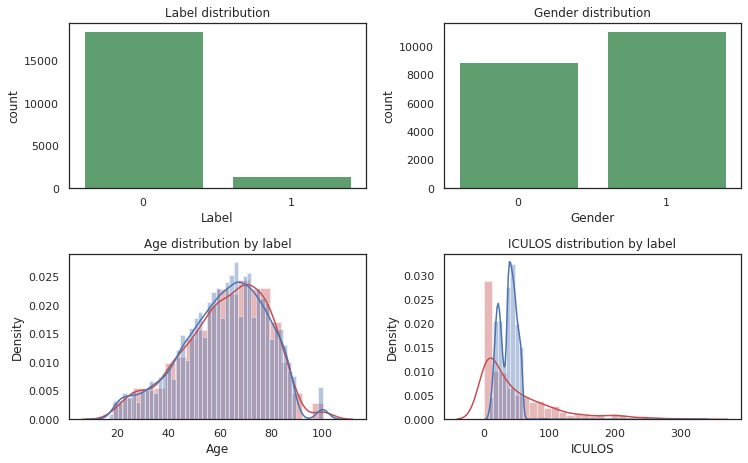

In [8]:
demo_cols = ['Label', 'Gender', 'Age', 'ICULOS']
demographic_df = df[demo_cols+['ID']].groupby(by='ID').max()
plot_results(2,2,demo_cols,demographic_df,types=['cat','cat','dist', 'dist'], fsize = (11,7))

### Laboratory values
###### Attributes description table

In [9]:
lab_attr= list(df.columns[9:35])
df_lab_attr_count = df[['ID','ICULOS']+lab_attr].groupby(by='ID').count()
df_lab_attr_count.describe()

,ICULOS,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,...,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets
count,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,...,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.00,20000.0,20000.00,20000.00
mean,37.74,2.04,1.55,3.08,2.61,2.08,1.30,0.59,2.57,0.59,...,1.49,3.50,0.55,0.36,3.34,2.78,1.09,2.4,0.24,2.23
std,21.76,4.53,2.43,6.20,4.89,3.93,3.17,1.19,2.29,1.20,...,1.73,3.57,1.05,0.99,3.32,2.58,1.78,2.1,1.02,1.80
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00
25%,24.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,1.00,0.00,0.00,1.00,1.00,0.00,1.0,0.00,1.00
50%,38.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,...,1.00,3.00,0.00,0.00,2.00,2.00,0.00,2.0,0.00,2.00
75%,47.00,2.00,2.00,4.00,3.00,3.00,1.00,1.00,3.00,1.00,...,2.00,4.00,1.00,0.00,4.00,3.00,2.00,3.0,0.00,3.00
max,336.00,100.00,49.00,111.00,106.00,80.00,79.00,30.00,47.00,30.00,...,30.00,81.00,29.00,12.00,61.00,53.00,35.00,52.0,28.00,33.00


#### Number of lab test in windows of 5 hours

In [10]:
# define function
def add_rolling_window(df, attr, window_size):
    df = df.sort_values(by=['ID','ICULOS'], ascending =[True,True])
    rolling = df[['ID']+attr].groupby('ID').rolling(window=window_size, closed='both').count()
    rolling= rolling.rename(columns={at: f'{window_size}w_sum_{at}' for at in attr})
    rolling=rolling[list(rolling.columns)[1:]].reset_index().set_index('level_1')
    # rolling= rolling.rename(columns={'level_1': 'serial'})
    # df = df.reset_index().rename(columns={'index': 'serial'})
    combined = df.join(rolling,how='left', rsuffix= 'r')
    return combined, rolling

In [11]:
# apply rolling_window function
df_with_roll, roll = add_rolling_window(df, lab_attr, 5)

In [12]:
# # describe-table for label=1
# df_with_roll[df_with_roll['Label']==1][list(roll.columns)].describe()

In [13]:
# # describe-table for label=0
# df_with_roll[df_with_roll['Label']==0][list(roll.columns)].describe()

##### Plot windows distributions for all laboratory values

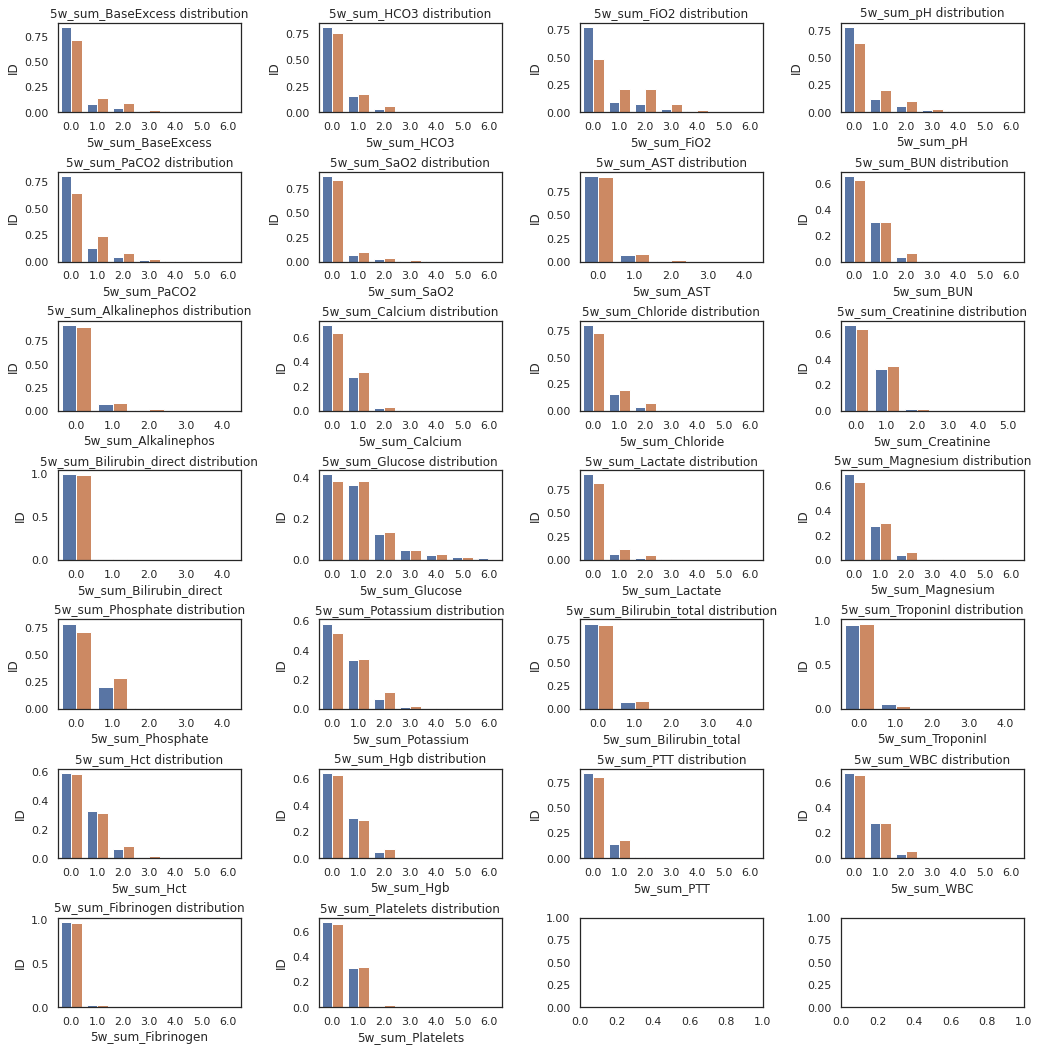

In [14]:
window_attr = list(roll.columns)[1:]
fig,axes = plt.subplots(7,4, figsize=(15,15))
fig.tight_layout(pad=3)
axes = axes.ravel()
sepsis_rows = df_with_roll[df_with_roll['Label']==1].shape[0]
non_sepsis_rows = df_with_roll[df_with_roll['Label']==0].shape[0]
for i,at in enumerate(window_attr):
    tmp = df_with_roll[['Label',at,'ID']].groupby(['Label',at], as_index=False).count().reset_index()
    tmp['ID'] = tmp.apply(lambda x: x['ID']/sepsis_rows if x['Label']==1 else  x.ID/non_sepsis_rows, axis=1)
    sns.barplot(x=at, y='ID', hue='Label', data=tmp, ax=axes[i])
    axes[i].set_title(f'{at} distribution')
    axes[i].get_legend().remove()

##### Plot windows distributions for chosen values on the preproccesed aggregated data

In [15]:
from math import floor, ceil

# helper function
def convert_to_bins(x):
    fl = floor(x)
    ce = ceil(x)

    if x-fl < ce-x:
        if fl==0 and x>0.15:
            return 0.5
        return fl
    return ce

In [16]:
allcols = list(df_processed.columns)
window_cols = [x for x in allcols if '5w' in x]

# apply creating intervals to windows features
tmp2 = df_processed.copy()
for col in window_cols:
    tmp2[f'{col}__interval'] = tmp2[col].apply(convert_to_bins)

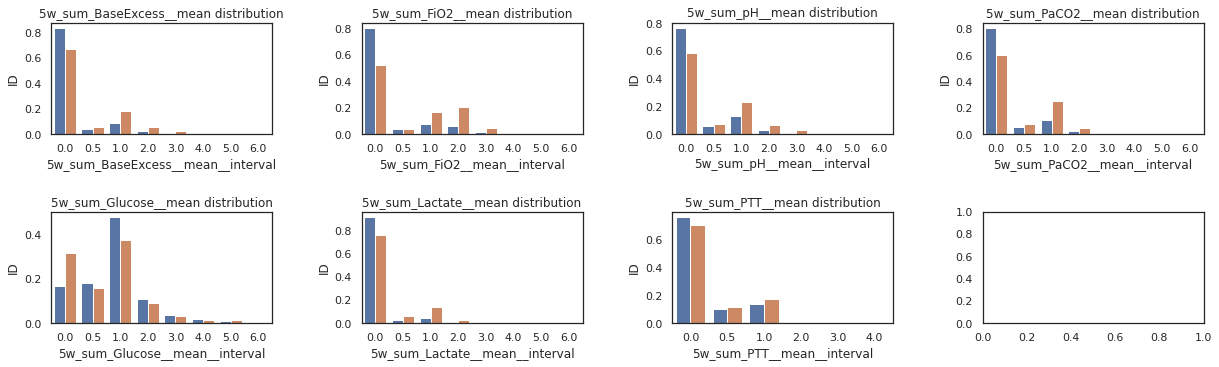

In [17]:
# Plot windows features
fig,axes = plt.subplots(2,4, figsize=(18,6))
fig.tight_layout(pad=4.5)
axes = axes.ravel()
sepsis_rows = df_processed[df_processed['Label']==1].shape[0]
non_sepsis_rows = df_processed[df_processed['Label']==0].shape[0]

for i,at in enumerate(window_cols):
    at2 = f'{at}__interval'
    tmp = tmp2[['Label',at2,'ID']].groupby(['Label',at2], as_index=False).count().reset_index()
    tmp['ID'] = tmp.apply(lambda x: x['ID']/sepsis_rows if x['Label']==1 else  x.ID/non_sepsis_rows, axis=1)
    sns.barplot(x=at2, y='ID', hue='Label', data=tmp, ax=axes[i])
    axes[i].set_title(f'{at} distribution')
    axes[i].get_legend().remove()

# del tmp2, tmp

### Exploring features' distributions

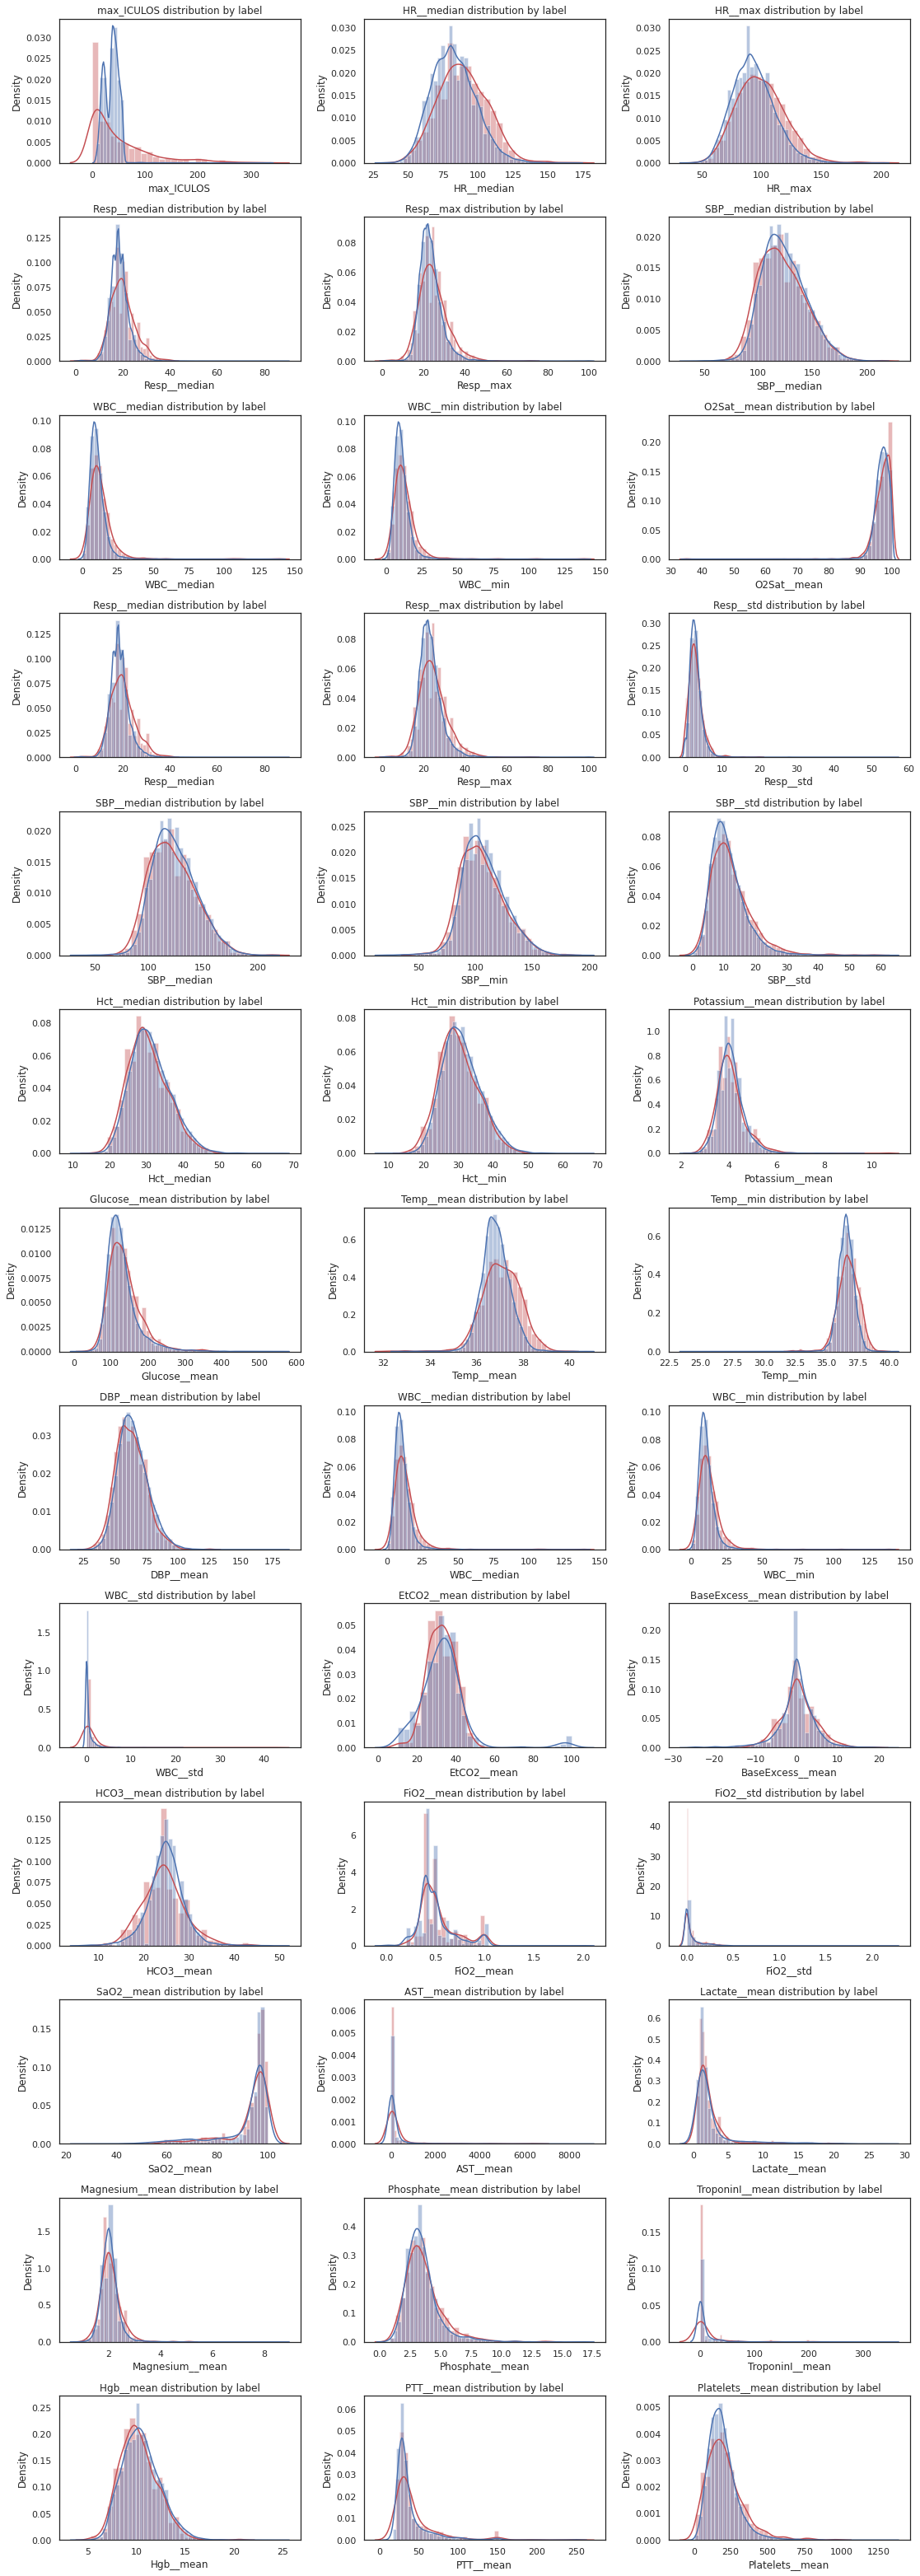

In [18]:
plot_results(3,13,['max_ICULOS', 'HR__median', 'HR__max',\
                  'Resp__median', 'Resp__max', 'SBP__median',\
                  'WBC__median', 'WBC__min', 'O2Sat__mean',\
                  'Resp__median', 'Resp__max', 'Resp__std',\
                  'SBP__median', 'SBP__min', 'SBP__std',\
                  'Hct__median', 'Hct__min', 'Potassium__mean',\
                  'Glucose__mean', 'Temp__mean', 'Temp__min',\
                  'DBP__mean', 'WBC__median',
       'WBC__min', 'WBC__std', 'EtCO2__mean', 'BaseExcess__mean', 'HCO3__mean',
       'FiO2__mean', 'FiO2__std', 'SaO2__mean', 'AST__mean', 'Lactate__mean',
       'Magnesium__mean', 'Phosphate__mean', 'TroponinI__mean', 'Hgb__mean',
       'PTT__mean', 'Platelets__mean'\
                  ],df_processed,['dist']*3*13,fsize=(16,44))

## Hypothesis Testing
We will use T-Test to check if the mean feature for each patients is from the same distribution for patients that had sepsis and patients that didnt.

In [19]:
from scipy.stats import ttest_ind
same = []
not_same = []
for feature in allcols:
    if feature not in ['Label','ID','Gender']:
        sepsis =list(df_processed[(df_processed['Label']==1)][feature].values)
        not_sepsis =list(df_processed[(df_processed['Label']==0)][feature].values)
        if (('HR' in feature) or ('Resp' in feature)):
        # HR is greater when a patient has sepsis
            alterantive = 'greater'
        if 'SBP' in feature:
            alterantive = 'less'
        else:
            alterantive = 'two-sided'
        stat,p = ttest_ind(sepsis,not_sepsis, equal_var=False,alternative=alterantive )
        # print(f'* {feature} *')
        if p<0.05:
            not_same.append(feature)
        else:
            same.append(feature)
print('Reject Null Hypothesis For')
print(not_same)
print('Accept Null Hypothesis For')
print(same)


Reject Null Hypothesis For
['max_ICULOS', 'SOFA__max', 'Unit2__max', 'Unit3__max', 'HospAdmTime__mean', '5w_sum_BaseExcess__mean', '5w_sum_FiO2__mean', '5w_sum_pH__mean', '5w_sum_PaCO2__mean', '5w_sum_Glucose__mean', '5w_sum_Lactate__mean', '5w_sum_PTT__mean', 'freq_BaseExcess', 'freq_HCO3', 'freq_FiO2', 'freq_pH', 'freq_PaCO2', 'freq_SaO2', 'freq_AST', 'freq_BUN', 'freq_Alkalinephos', 'freq_Calcium', 'freq_Chloride', 'freq_Glucose', 'freq_Lactate', 'freq_Magnesium', 'freq_Phosphate', 'freq_Potassium', 'freq_Bilirubin_total', 'freq_Hct', 'freq_Hgb', 'freq_PTT', 'freq_WBC', 'freq_Fibrinogen']
Accept Null Hypothesis For
['Unit1__max', 'HR__median', 'HR__max', 'HR__std', 'MAP__median', 'MAP__min', 'O2Sat__mean', 'O2Sat__std', 'Resp__median', 'Resp__max', 'Resp__std', 'SBP__median', 'SBP__min', 'SBP__std', 'Hct__median', 'Hct__min', 'Potassium__mean', 'Glucose__mean', 'Glucose__std', 'Temp__mean', 'Temp__min', 'DBP__mean', 'WBC__median', 'WBC__min', 'WBC__std', 'EtCO2__mean', 'BaseExcess__